## LOADS

In [68]:
import os
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline
import numpy as np

In [69]:

archive = "e2e_result_stats_under600.csv"
names = "e2e_names.csv"
groups= "e2e_RNA_Groups.csv"
lens = "e2e_lenghts.csv"

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
stats_path = (path + "/saved_stats/" + archive)
names_path = (path +"/saved_stats/" + names)
lens_path = (path + "/saved_stats/" + lens)
groups_path = (path + "/saved_stats/" + groups)

list_bin_acc = []
list_bin_recall = []
list_bin_f = []
list_bin_prec = []
list_ex_acc = []
list_ex_recall = []
list_ex_f = []
list_ex_prec = []
list_ex_amm = []

with open(stats_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    data = list(csv_reader)

with open(names_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    names = list(csv_reader)

with open(lens_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    lens = list(csv_reader)

with open(groups_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    groups = list(csv_reader)

names = list(names[0][1:])
groups = list(groups[0][1:])
lens = list(map(float,lens[0][1:]))

elements = list(map(float,data[0][1:-1]))

list_bin_acc = list(map(float,data[1][1:]))
list_bin_recall = list(map(float,data[2][1:]))
list_bin_f = list(map(float,data[3][1:]))
list_bin_prec = list(map(float,data[4][1:]))

list_ex_acc = list(map(float,data[5][1:]))
list_ex_recall = list(map(float,data[6][1:]))
list_ex_f = list(map(float,data[7][1:]))
list_ex_prec = list(map(float,data[8][1:]))
list_ex_amm = list(map(float,data[9][1:]))
for i in range(len(list_ex_amm)):
    list_ex_amm[i] = list_ex_amm[i]/100

end_results = []

In [70]:
#Order the results by the groups of our database:
#list_something = [index in the result lists]

group_ids = ["5s", "16s", "23s", "srp", "grp", "tRNA", "tmRNA", "RNaseP"]

list_5s = []
list_16s = []
list_23s = []
list_srp = []
list_grp = []
list_TRNA = []
list_tmRNA = []
list_RNaseP = []
i = 0
while i < len(names):
    if groups[i] == "5s":      list_5s.append(i)
    if groups[i] == "16s":     list_16s.append(i)
    if groups[i] == "23s":     list_23s.append(i)
    if groups[i] == "srp":     list_srp.append(i)
    if groups[i] == "grp":     list_grp.append(i)
    if groups[i] == "tRNA":    list_TRNA.append(i)
    if groups[i] == "tmRNA":   list_tmRNA.append(i)
    if groups[i] == "RNaseP":  list_RNaseP.append(i)
    i = i + 1


## 5s


In [71]:
## 5S analisys (E2E)
auxList = list_5s
auxName = "5s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]


get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_5s = sorted_get_ex_acc


## 16s

In [72]:
## 16s analisys 
auxList = list_16s
auxName = "16s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_16 = sorted_get_ex_acc



## 23s

In [73]:
## 23s analisys 
auxList = list_23s
auxName = "23s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_23 = sorted_get_ex_acc


## Srp

In [74]:
## srp analisys 
auxList = list_srp
auxName = "Srp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_srp = sorted_get_ex_acc

## GRP

In [75]:
## grp analisys 
auxList = list_grp
auxName = "Grp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_grp = sorted_get_ex_acc

## TRNA

In [76]:
## TRNA analisys 
auxList = list_TRNA
auxName = "TRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_TRNA = sorted_get_ex_acc

## TMRNA

In [77]:
## TmRNA analisys 
auxList = list_tmRNA
auxName = "tmRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_TMRNA = sorted_get_ex_acc



## RNaseP

In [78]:
## RNaseP analisys 
auxList = list_RNaseP
auxName = "RNaseP"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_rnasep = sorted_get_ex_acc

## End stats:

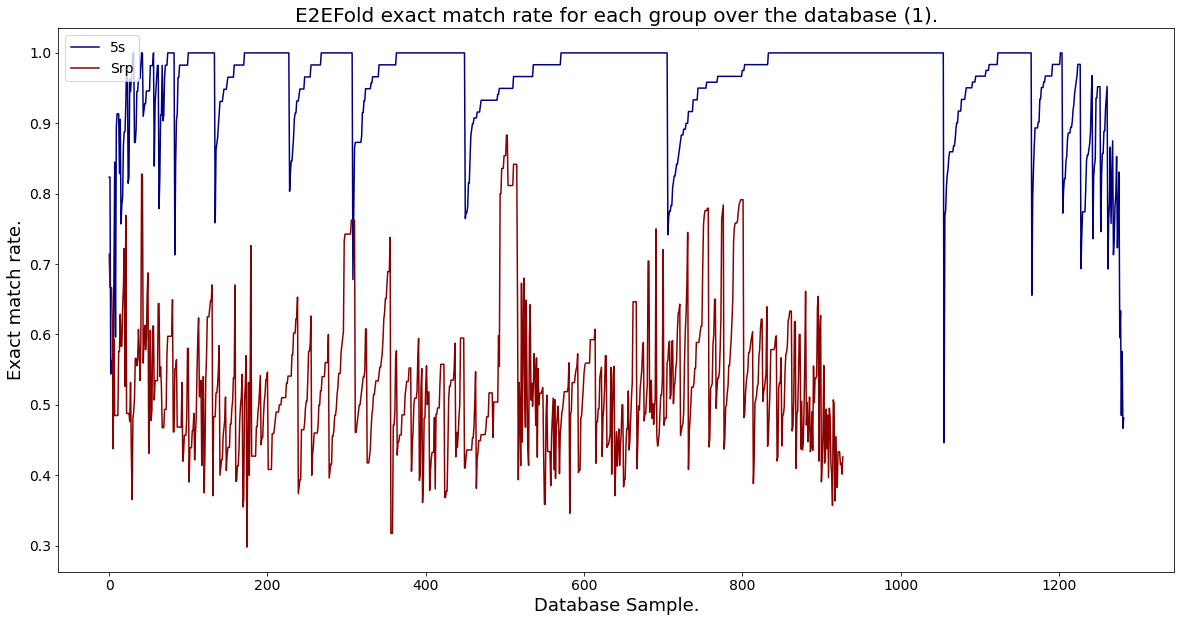

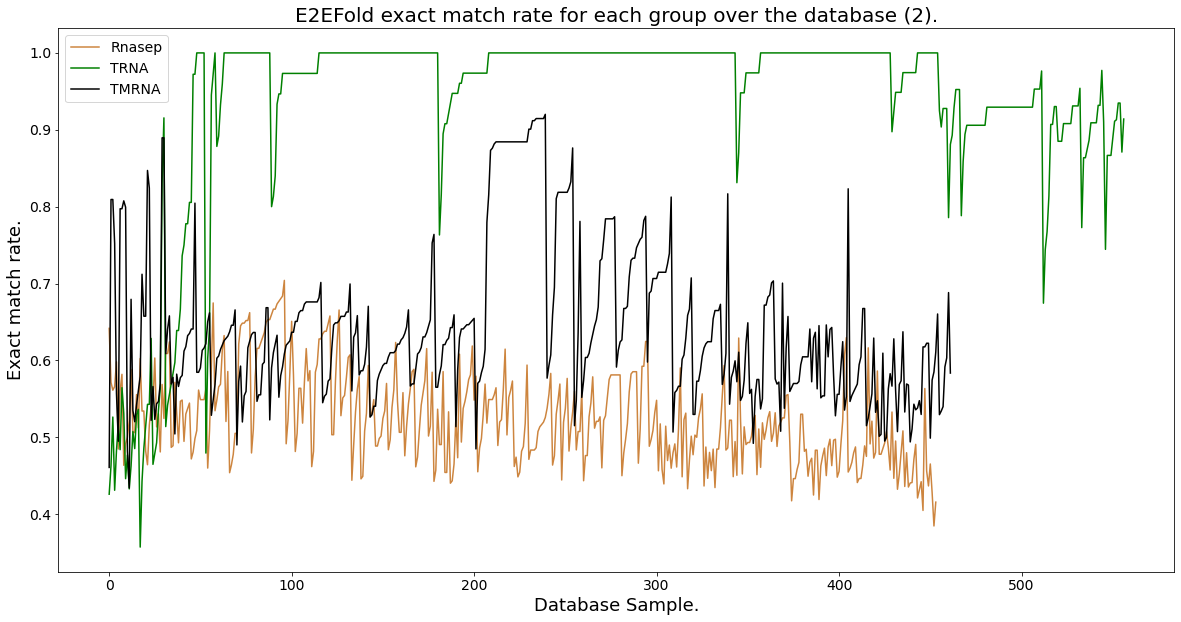

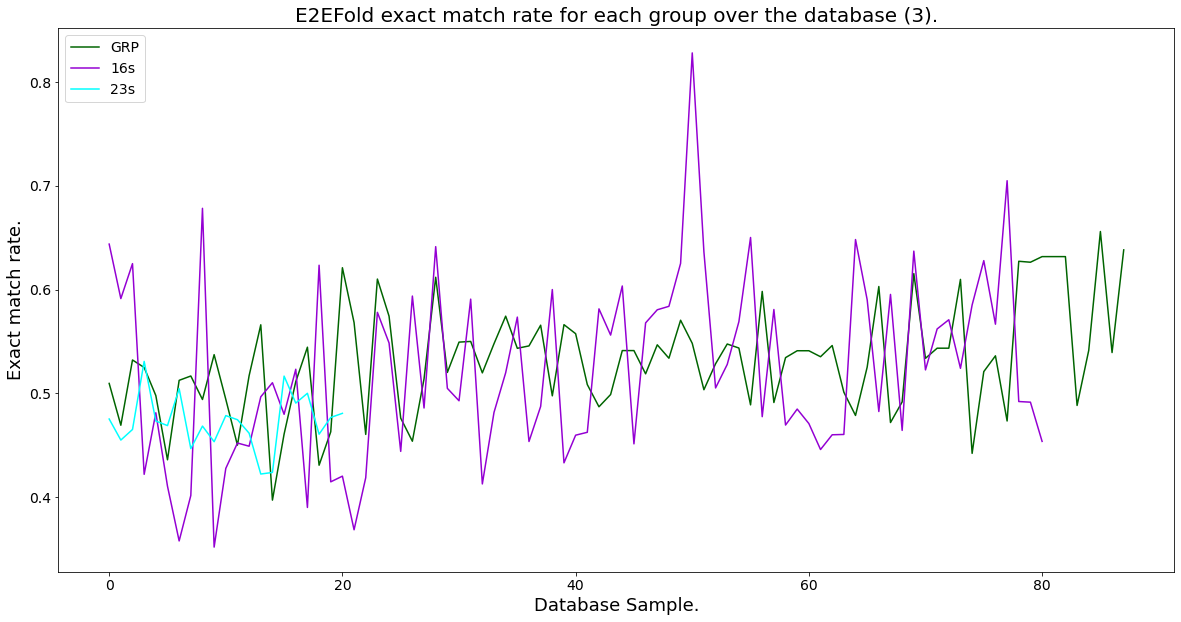

In [79]:
f, ax = plt.subplots(figsize=(20, 10))

ax.plot(sorted_get_ex_acc_5s, label='5s', color="navy")
ax.plot(sorted_get_ex_acc_srp, label='Srp',color="darkred")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.xlabel("Database Sample.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.title("E2EFold exact match rate for each group over the database (1).", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()


f, ax = plt.subplots(figsize=(20, 10))
ax.plot(sorted_get_ex_acc_rnasep, label='Rnasep', color="peru")
ax.plot(sorted_get_ex_acc_TRNA, label='TRNA', color="green")
ax.plot(sorted_get_ex_acc_TMRNA, label='TMRNA', color="black")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.xlabel("Database Sample.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.title("E2EFold exact match rate for each group over the database (2).", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()


f, ax = plt.subplots(figsize=(20, 10))
ax.plot(sorted_get_ex_acc_grp, label='GRP', color="darkgreen")
ax.plot(sorted_get_ex_acc_16, label='16s',color="darkviolet")
ax.plot(sorted_get_ex_acc_23, label='23s', color="aqua")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.xlabel("Database Sample.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.title("E2EFold exact match rate for each group over the database (3).", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()



In [80]:
sorted_all_ex_acc_e2e          =   [x for _, x in sorted(zip(lens,        list_ex_acc))]

cont = 0
hundred  =0
hundred2 =0
hundred3 =0
hundred4 =0
hundred5 =0
for i in sorted(lens):
    if i >= 100 and hundred == 0:
        hundred = cont
    if i >= 200 and hundred2 == 0:
        hundred2 = cont
    if i >= 300 and hundred3 == 0:
        hundred3 = cont
    if i >= 400 and hundred4 == 0:
        hundred4 = cont
    if i >= 500 and hundred5 == 0:
        hundred5 = cont
    cont = cont + 1

average_list_ex_1 = [ np.average(sorted_all_ex_acc_e2e[:hundred]),
                    np.average(sorted_all_ex_acc_e2e[hundred:hundred2]),
                    np.average(sorted_all_ex_acc_e2e[hundred2:hundred3]),
                    np.average(sorted_all_ex_acc_e2e[hundred3:hundred4]),
                    np.average(sorted_all_ex_acc_e2e[hundred4:hundred5]),
                    np.average(sorted_all_ex_acc_e2e[hundred5:])
                    ]
average_list_len_1 = [np.average(list(sorted(lens))[:hundred]),
                    np.average(list(sorted(lens))[hundred:hundred2]),
                    np.average(list(sorted(lens))[hundred2:hundred3]),
                    np.average(list(sorted(lens))[hundred3:hundred4]),
                    np.average(list(sorted(lens))[hundred4:hundred5]),
                    np.average(list(sorted(lens))[hundred5:])
                    ]

In [81]:

archive = "RNAFOLD_result_stats.csv"
groups= "RNAFOLD_RNA_Groups.csv"
lens = "RNAFOLD_lengths.csv"

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
stats_path = (path + "/saved_stats/" + archive)
lens_path = (path + "/saved_stats/" + lens)
groups_path = (path + "/saved_stats/" + groups)

list_bin_acc = []
list_bin_recall = []
list_bin_f = []
list_bin_prec = []
list_ex_acc = []
list_ex_recall = []
list_ex_f = []
list_ex_prec = []
list_ex_amm = []

with open(stats_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    data = list(csv_reader)

with open(lens_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    lens = list(csv_reader)

with open(groups_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    groups = list(csv_reader)

groups = list(groups[0][1:])
lens = list(map(float,lens[0][1:]))

elements = list(map(float,data[0][1:-1]))

list_bin_acc = list(map(float,data[1][1:]))
list_bin_recall = list(map(float,data[2][1:]))
list_bin_f = list(map(float,data[3][1:]))
list_bin_prec = list(map(float,data[4][1:]))

list_ex_acc = list(map(float,data[5][1:]))
list_ex_recall = list(map(float,data[6][1:]))
list_ex_f = list(map(float,data[7][1:]))
list_ex_prec = list(map(float,data[8][1:]))
list_ex_amm = list(map(float,data[9][1:]))
for i in range(len(list_ex_amm)):
    list_ex_amm[i] = list_ex_amm[i]/100



## RNAFOLD

get_lens            =   lens
get_bin_acc         =   list_bin_acc
get_bin_recall      =   list_bin_recall
get_bin_f           =   list_bin_f
get_bin_precision   =   list_bin_prec

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   list_ex_acc
get_ex_recall       =   list_ex_recall
get_ex_f            =   list_ex_f
get_ex_prec         =   list_ex_prec
get_ex_amm          =   list_ex_amm

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]

sorted_all_ex_acc          =   [x for _, x in sorted(zip(lens,        list_ex_acc))]

cont = 0
hundred  =2
hundred2 =55
hundred3 =-6


average_list_ex_3 = [ np.average(sorted_all_ex_acc[:hundred]),
                    np.average(sorted_all_ex_acc[hundred:-6:]),
                    np.average(sorted_all_ex_acc[-6:])
                    ]
average_list_len_3 = [np.average(list(sorted(lens))[:hundred]),
                    np.average(list(sorted(lens))[hundred:-6:]),
                    np.average(list(sorted(lens))[-6:])
                    ]
print(sorted(lens))


[264.0, 289.0, 311.0, 344.0, 344.0, 345.0, 345.0, 345.0, 347.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 348.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 349.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 350.0, 351.0, 351.0, 351.0, 352.0, 353.0, 354.0, 354.0, 354.0, 354.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 355.0, 356.0, 356.0, 356.0, 356.0, 356.0, 356.0, 356.0, 356.0, 356.0, 356.0, 357.0, 358.0, 359.0, 359.0, 359.0, 361.0, 361.0, 362.0, 362.0, 362.0, 362.0, 362.0, 362.0, 362.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 363.0, 364.0, 364.0, 364.0, 364.0, 364.0, 364.0, 364.0, 364.0, 365.0, 365.0, 367.0, 367.0, 367.0, 367.0, 367.0, 368.0, 368.0, 369.0, 369.0, 369.0, 372.0, 378.0, 379.0, 379.0, 381.0, 381.0, 381.0, 381.0, 382.0, 384.0, 386.0, 386.0, 389.0, 394.0, 394.0, 396.0, 396.0, 397.0, 397.0, 397.0, 397.0, 397.0, 398.0

In [82]:

archive = "my_ufold.csv"
groups= "ufold_RNA_Groups.csv"
lens = "ufold_lengths.csv"

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
stats_path = (path + "/saved_stats/" + archive)
lens_path = (path + "/saved_stats/" + lens)
groups_path = (path + "/saved_stats/" + groups)

list_bin_acc = []
list_bin_recall = []
list_bin_f = []
list_bin_prec = []
list_ex_acc = []
list_ex_recall = []
list_ex_f = []
list_ex_prec = []
list_ex_amm = []

with open(stats_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    data = list(csv_reader)

with open(lens_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    lens = list(csv_reader)

with open(groups_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    groups = list(csv_reader)

groups = list(groups[0][1:])
lens = list(map(float,lens[0][1:]))

elements = list(map(float,data[0][1:-1]))

list_bin_acc = list(map(float,data[1][1:]))
list_bin_recall = list(map(float,data[2][1:]))
list_bin_f = list(map(float,data[3][1:]))
list_bin_prec = list(map(float,data[4][1:]))

list_ex_acc = list(map(float,data[5][1:]))
list_ex_recall = list(map(float,data[6][1:]))
list_ex_f = list(map(float,data[7][1:]))
list_ex_prec = list(map(float,data[8][1:]))
list_ex_amm = list(map(float,data[9][1:]))
for i in range(len(list_ex_amm)):
    list_ex_amm[i] = list_ex_amm[i]/100

group_ids = ["5s", "16s", "23s", "srp", "grp", "tRNA", "tmRNA", "RNaseP"]

list_5s = []
list_16s = []
list_23s = []
list_srp = []
list_grp = []
list_TRNA = []
list_tmRNA = []
list_RNaseP = []
i = 0
while i < len(elements):
    if groups[i] == "5s":      list_5s.append(i)
    if groups[i] == "16s":     list_16s.append(i)
    if groups[i] == "23s":     list_23s.append(i)
    if groups[i] == "srp":     list_srp.append(i)
    if groups[i] == "grp":     list_grp.append(i)
    if groups[i] == "tRNA":    list_TRNA.append(i)
    if groups[i] == "tmRNA":   list_tmRNA.append(i)
    if groups[i] == "RNaseP":  list_RNaseP.append(i)
    i = i + 1

## DATASET
## 5s

## 5S analisys (E2E)
auxList = list_5s
auxName = "5s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]


get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_5s = sorted_get_ex_acc

## 16s
## 16s analisys 
auxList = list_16s
auxName = "16s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_16 = sorted_get_ex_acc


## 23s
## 23s analisys 
auxList = list_23s
auxName = "23s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_23 = sorted_get_ex_acc

## Srp
## srp analisys 
auxList = list_srp
auxName = "Srp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_srp = sorted_get_ex_acc
## GRP
## grp analisys 
auxList = list_grp
auxName = "Grp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_grp = sorted_get_ex_acc

## TRNA
## TRNA analisys 
auxList = list_TRNA
auxName = "TRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_TRNA = sorted_get_ex_acc
## TMRNA
## TmRNA analisys 
auxList = list_tmRNA
auxName = "tmRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_TMRNA = sorted_get_ex_acc


## RNaseP
## RNaseP analisys 
auxList = list_RNaseP
auxName = "RNaseP"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_rnasep = sorted_get_ex_acc


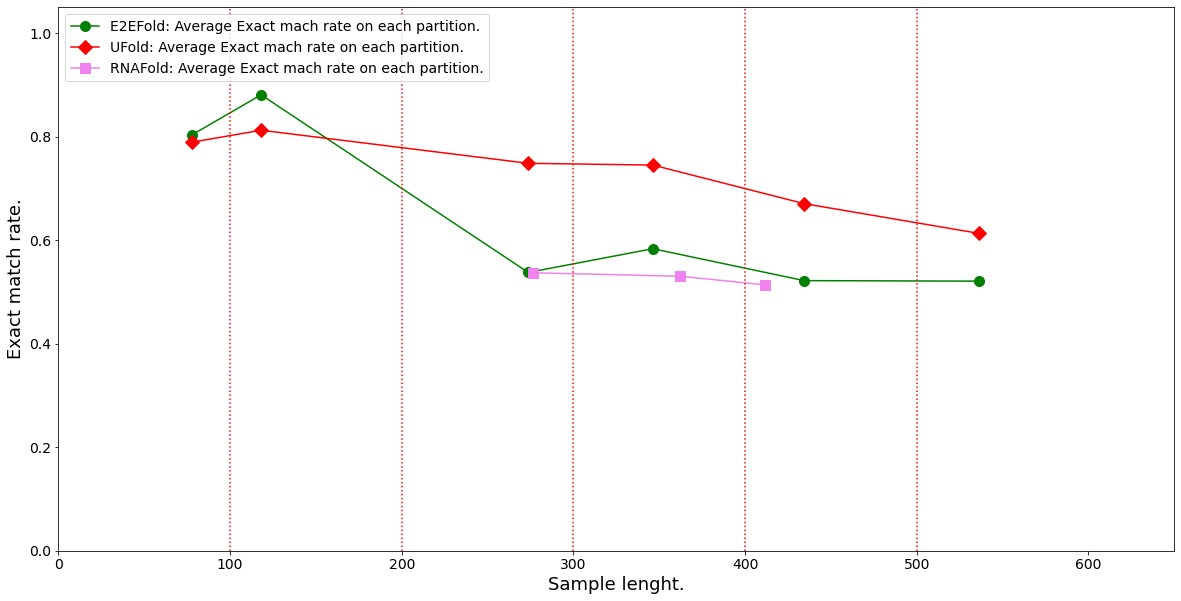

In [83]:
sorted_all_ex_acc          =   [x for _, x in sorted(zip(lens,        list_ex_acc))]

cont = 0
hundred  =0
hundred2 =0
hundred3 =0
hundred4 =0
hundred5 =0
for i in sorted(lens):
    if i >= 100 and hundred == 0:
        hundred = cont
    if i >= 200 and hundred2 == 0:
        hundred2 = cont
    if i >= 300 and hundred3 == 0:
        hundred3 = cont
    if i >= 400 and hundred4 == 0:
        hundred4 = cont
    if i >= 500 and hundred5 == 0:
        hundred5 = cont
    cont = cont + 1

average_list_ex_2 = [ np.average(sorted_all_ex_acc[:hundred]),
                    np.average(sorted_all_ex_acc[hundred:hundred2]),
                    np.average(sorted_all_ex_acc[hundred2:hundred3]),
                    np.average(sorted_all_ex_acc[hundred3:hundred4]),
                    np.average(sorted_all_ex_acc[hundred4:hundred5]),
                    np.average(sorted_all_ex_acc[hundred5:])
                    ]
average_list_len_2 = [np.average(list(sorted(lens))[:hundred]),
                    np.average(list(sorted(lens))[hundred:hundred2]),
                    np.average(list(sorted(lens))[hundred2:hundred3]),
                    np.average(list(sorted(lens))[hundred3:hundred4]),
                    np.average(list(sorted(lens))[hundred4:hundred5]),
                    np.average(list(sorted(lens))[hundred5:])
                    ]

f, ax = plt.subplots(figsize=(20, 10))

ax.plot(average_list_len_1, average_list_ex_1, color="green", marker="o", linestyle="-", markersize=10, label = "E2EFold: Average Exact mach rate on each partition.")
ax.plot(average_list_len_2, average_list_ex_2, color="red", marker="D", linestyle="-", markersize=10, label = "UFold: Average Exact mach rate on each partition.")
ax.plot(average_list_len_3, average_list_ex_3, color="violet", marker="s", linestyle="-", markersize=10, label = "RNAFold: Average Exact mach rate on each partition.")
ax.plot()
plt.axvline(x=100, linestyle=":", color="r")
plt.axvline(x=200, linestyle=":", color="r")
plt.axvline(x=300, linestyle=":", color="r")
plt.axvline(x=400, linestyle=":", color="r")
plt.axvline(x=500, linestyle=":", color="r")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.ylim(0, 1.05)
plt.xlim(0, 650)
plt.xlabel("Sample lenght.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.legend(loc=2, prop={'size': 14})
plt.show()
